In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 6

In [16]:
#secondo me c'è qualche problema
#descrivere modifiche al codice

## Analisi in assenza di campo esterno

Fase di equilibrazione

Il concetto è che l'equilibrazione è difficile a basse temperature perchè io inizializzo il sistema con spin random ergo se vedo che alla temperatura più bassa già dopo 20 mosse il sistema è equilibrato sono praticamente in una botte di ferro se ogni blocco dura 20000, anche perchè io faccio il primo campionamento a $\mathrm{T^*}=2.0$ e poi scendo man mano di temperatura mettendo la configurazione finale del campionamento precedente come configurazione iniziale del nuovo campionamento ergo essenzialmente a ogni simulazione il sistema parte già equilibrato.

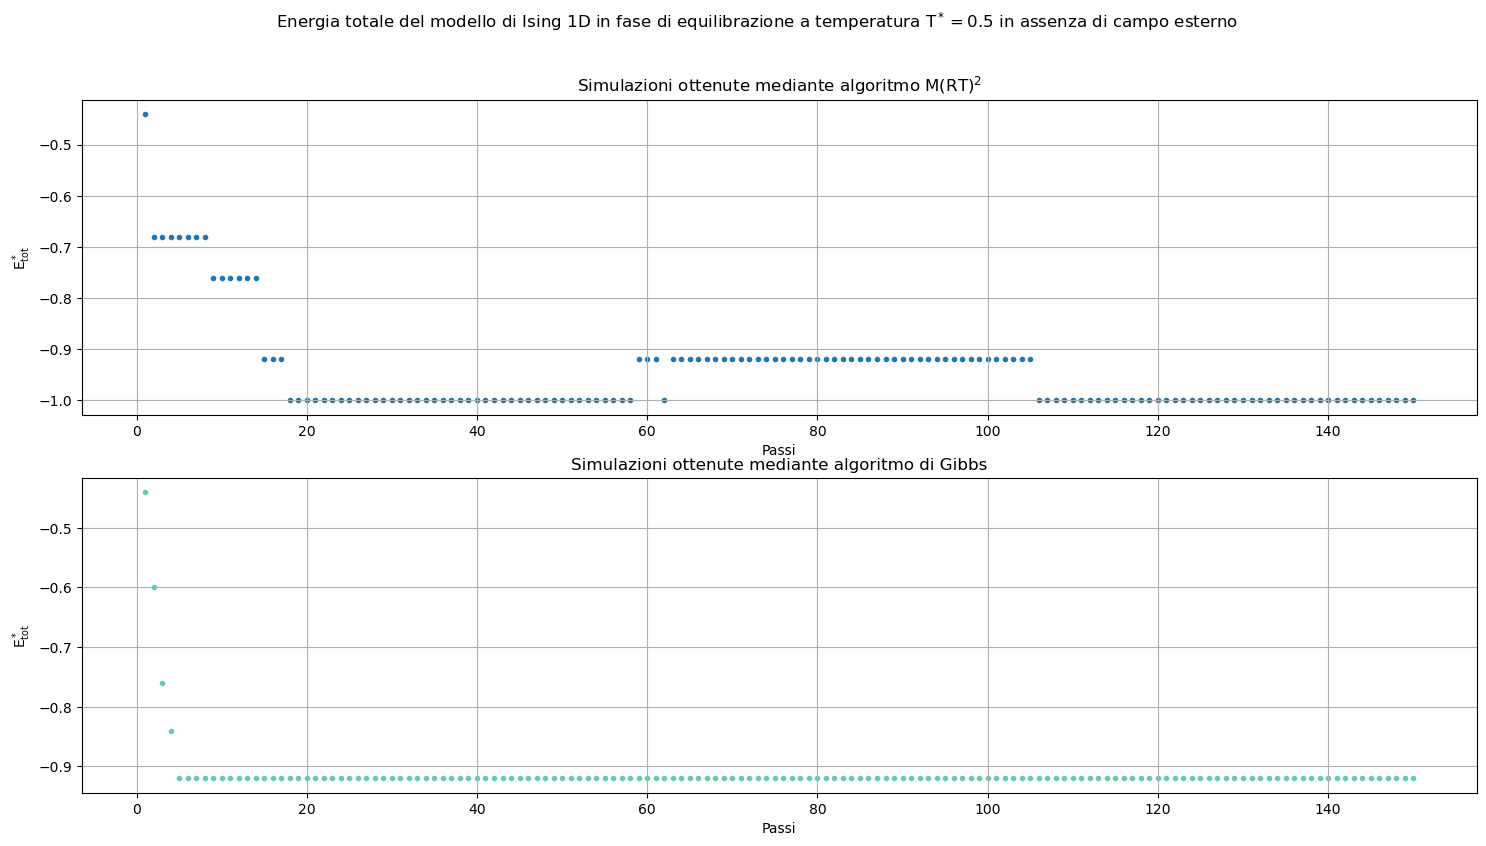

In [3]:
Neq0=150  #passi della simulazione di equilibrazione
xeq0=np.arange(Neq0)+1  #Etot di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange

metr_eq0=np.loadtxt("Risultati/metr_eqtenergy0.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gib_eq0=np.loadtxt("Risultati/gib_eqtenergy0.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

eqfig0 ,(eqplt01, eqplt02) = plt.subplots(2, 1, figsize=(18, 9))

eqplt01.scatter(xeq0, metr_eq0, marker='.')
eqplt01.set_xlabel("Passi")
eqplt01.set_ylabel(r"$\mathrm{E_{tot}^*}$")
eqplt01.set_title(r"Simulazioni ottenute mediante algoritmo $\mathrm{M(RT)^2}$")
eqplt01.grid(True)

eqplt02.scatter(xeq0, gib_eq0, marker='.', color="mediumaquamarine")
eqplt02.set_xlabel("Passi")
eqplt02.set_ylabel(r"$\mathrm{E_{tot}^*}$")
eqplt02.set_title(r"Simulazioni ottenute mediante algoritmo di Gibbs")
eqplt02.grid(True)

eqfig0.suptitle(r"Energia totale del modello di Ising 1D in fase di equilibrazione a temperatura $\mathrm{T^*}=0.5$ in assenza di campo esterno")
plt.show()
#quando faccio Gibbs fare la stessa cosa

In [4]:
#E' giusto che non si stabilizzino sullo stesso valore?

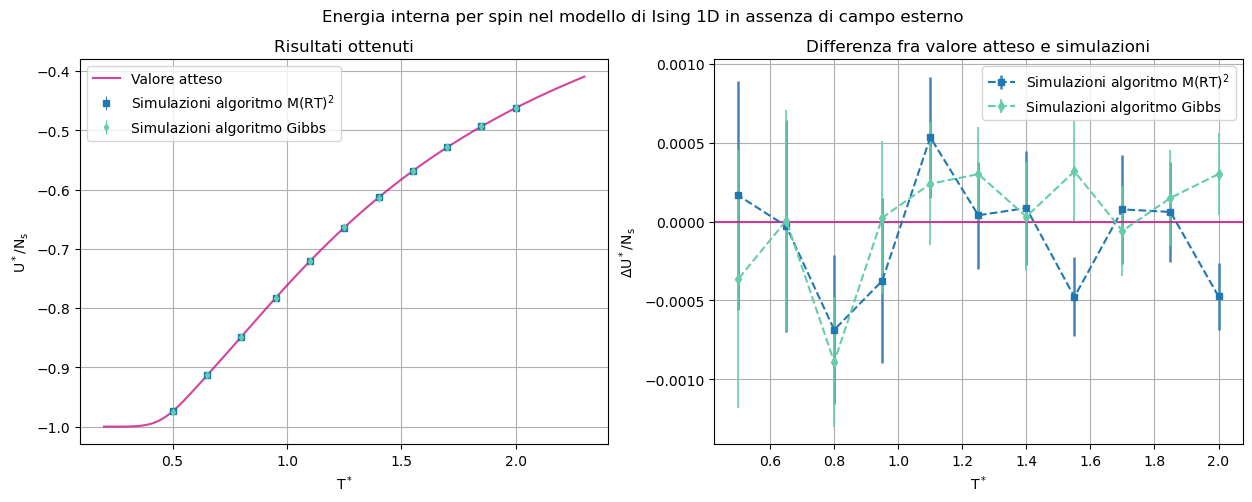

In [2]:
def Etot(T):  #calcolo analitico dell'energia interna
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return -J*( th + ch*thN )/( 1 + thN )

T=np.linspace(0.2, 2.3, 200)  #temperature per il plot del valore analitico

x, metr_toten, metr_erroren=np.loadtxt("Risultati/metr_fin_toten.dat", usecols=(0, 1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_toten, gib_erroren=np.loadtxt("Risultati/gib_fin_toten.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

enfig ,(enplt1, enplt2) = plt.subplots(1, 2, figsize=(15, 5))

enplt1.plot(T, Etot(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
enplt1.errorbar(x, metr_toten, yerr=metr_erroren, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt1.errorbar(x, gib_toten, yerr=gib_erroren, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
enplt1.set_xlabel(r"$\mathrm{T^*}$")
enplt1.set_ylabel(r"$\mathrm{U^* / N_s}$")
enplt1.set_title("Risultati ottenuti")
enplt1.grid(True)
enplt1.legend()

enplt2.errorbar(x, metr_toten-Etot(x), yerr=metr_erroren, fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt2.errorbar(x, gib_toten-Etot(x), yerr=gib_erroren, fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
enplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
enplt2.set_xlabel(r"$\mathrm{T^*}$")
enplt2.set_ylabel(r"$\mathrm{\Delta U^* / N_s}$")
enplt2.set_title("Differenza fra valore atteso e simulazioni")
enplt2.grid(True)
enplt2.legend()

enfig.suptitle("Energia interna per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

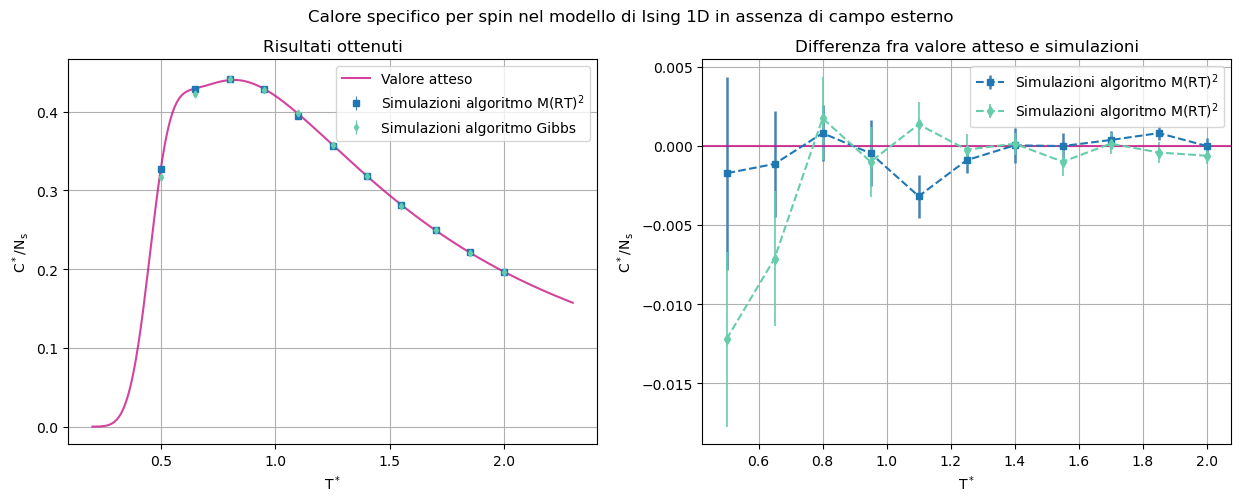

In [13]:
def Cs(T):  #calcolo analitico del calore specifico
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

metr_calspec, metr_errorcs=np.loadtxt("Risultati/metr_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_calspec, gib_errorcs=np.loadtxt("Risultati/gib_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

csfig ,(csplt1, csplt2) = plt.subplots(1, 2, figsize=(15, 5))

csplt1.plot(T, Cs(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
csplt1.errorbar(x, metr_calspec, yerr=metr_errorcs, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt1.errorbar(x, gib_calspec, yerr=gib_errorcs, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
csplt1.set_xlabel(r"$\mathrm{T^*}$")
csplt1.set_ylabel(r"$\mathrm{C^* / N_s}$")
csplt1.set_title("Risultati ottenuti")
csplt1.grid(True)
csplt1.legend()

csplt2.errorbar(x, metr_calspec-Cs(x), yerr=metr_errorcs, fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt2.errorbar(x, gib_calspec-Cs(x), yerr=gib_errorcs, fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
csplt2.set_xlabel(r"$\mathrm{T^*}$")
csplt2.set_ylabel(r"$\mathrm{\Delta C^* / N_s}$")
csplt2.set_title("Differenza fra valore atteso e simulazioni")
csplt2.grid(True)
csplt2.legend()

csfig.suptitle("Calore specifico per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

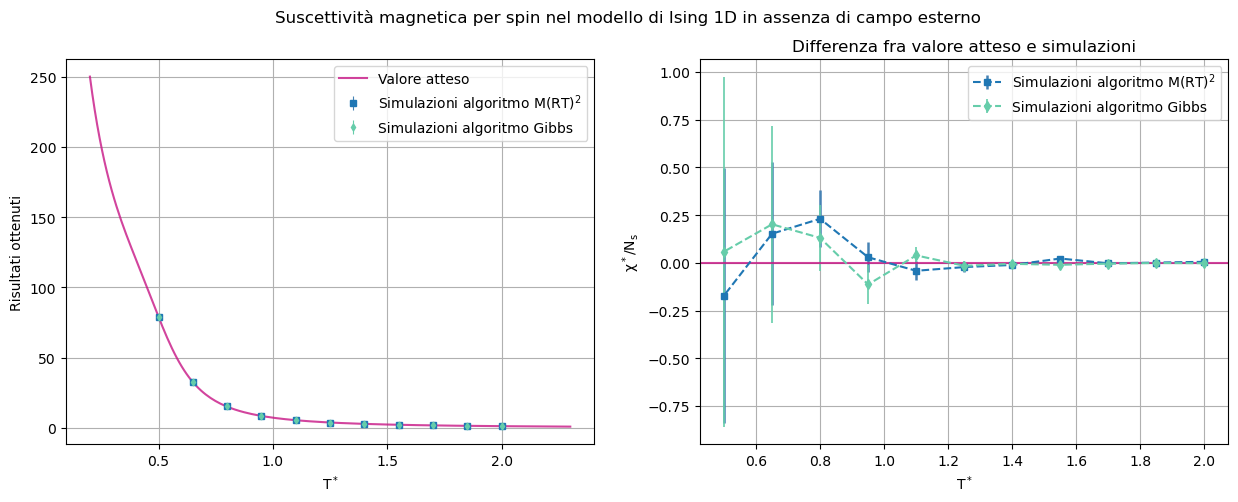

In [14]:
def Chi(T):  #calcolo analitico della suscettività
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    
metr_susc, metr_errorsu=np.loadtxt("Risultati/metr_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_susc, gib_errorsu=np.loadtxt("Risultati/gib_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

sufig ,(suplt1, suplt2) = plt.subplots(1, 2, figsize=(15, 5))

suplt1.plot(T, Chi(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
suplt1.errorbar(x, metr_susc, yerr=metr_errorsu, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt1.errorbar(x, gib_susc, yerr=gib_errorsu, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
suplt1.set_xlabel(r"$\mathrm{T^*}$")
suplt1.set_ylabel(r"$\mathrm{\Delta \chi ^* / N_s}$")
suplt1.set_ylabel("Risultati ottenuti")
suplt1.grid(True)
suplt1.legend()

suplt2.errorbar(x, metr_susc-Chi(x), yerr=metr_errorsu, fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt2.errorbar(x, gib_susc-Chi(x), yerr=gib_errorsu, fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
suplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
suplt2.set_xlabel(r"$\mathrm{T^*}$")
suplt2.set_ylabel(r"$\mathrm{ \chi ^* / N_s}$")
suplt2.set_title("Differenza fra valore atteso e simulazioni")
suplt2.grid(True)
suplt2.legend()

sufig.suptitle("Suscettività magnetica per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

## Analisi in presenza di campo esterno

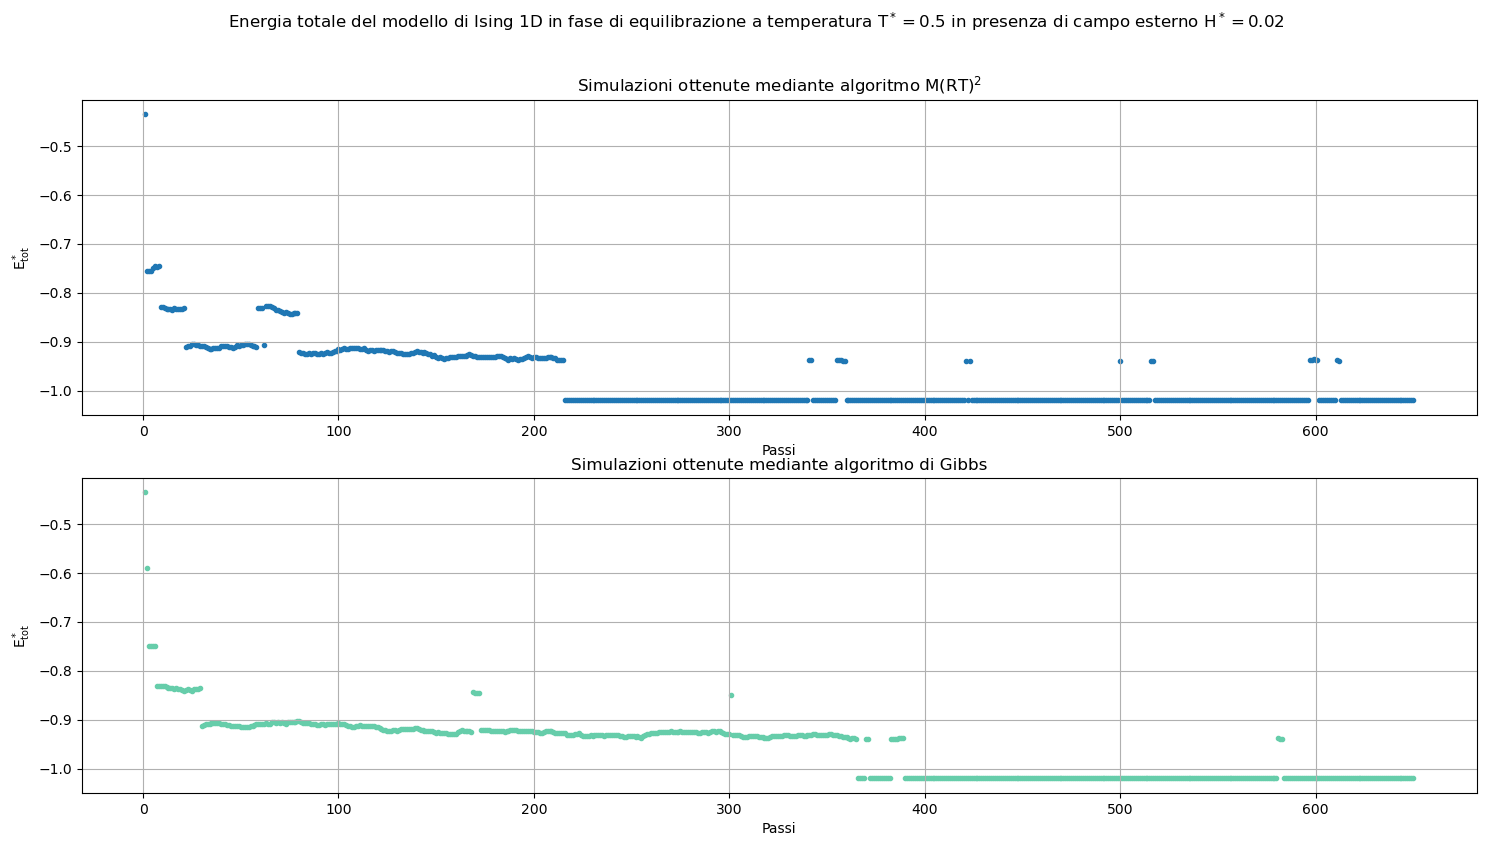

In [8]:
Neq2=650  #passi della simulazione di equilibrazione, con campo serve più tempo!
xeq2=np.arange(Neq2)+1  #Etot di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange

metr_eq2=np.loadtxt("Risultati/metr_eqtenergy2.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gib_eq2=np.loadtxt("Risultati/gib_eqtenergy2.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

eqfig2 ,(eqplt21, eqplt22) = plt.subplots(2, 1, figsize=(18, 9))

eqplt21.scatter(xeq2, metr_eq2, marker='.')
eqplt21.set_xlabel("Passi")
eqplt21.set_ylabel(r"$\mathrm{E_{tot}^*}$")
eqplt21.set_title(r"Simulazioni ottenute mediante algoritmo $\mathrm{M(RT)^2}$")
eqplt21.grid(True)

eqplt22.scatter(xeq2, gib_eq2, marker='.', color="mediumaquamarine")
eqplt22.set_xlabel("Passi")
eqplt22.set_ylabel(r"$\mathrm{E_{tot}^*}$")
eqplt22.set_title(r"Simulazioni ottenute mediante algoritmo di Gibbs")
eqplt22.grid(True)

eqfig2.suptitle(r"Energia totale del modello di Ising 1D in fase di equilibrazione a temperatura $\mathrm{T^*}=0.5$ in presenza di campo esterno $\mathrm{H^*}=0.02$")
plt.show()

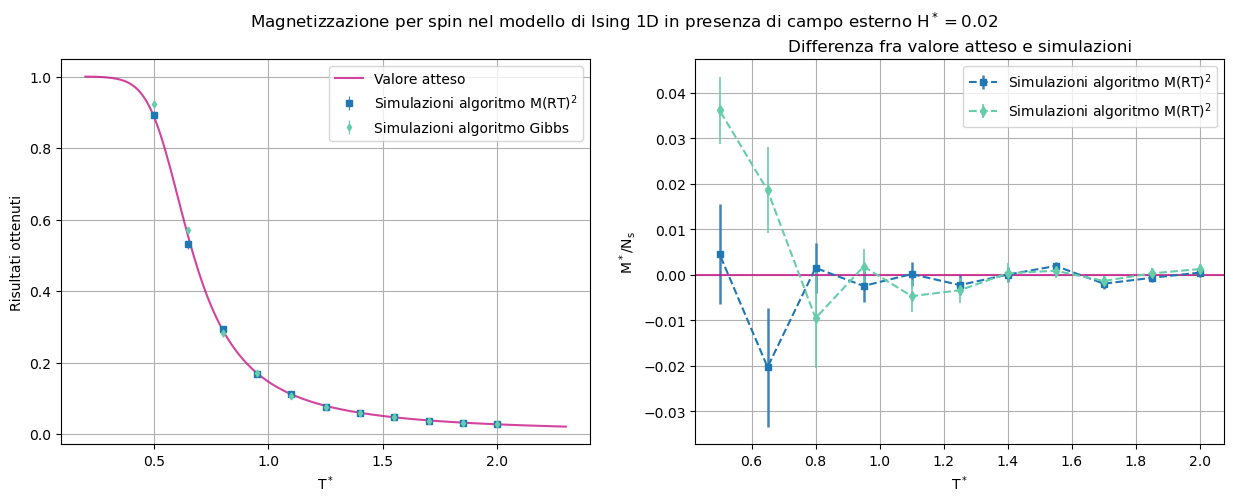

In [15]:
def Mag(T):  #calcolo analitico della magnetizzazione
    h=0.02 #external field
    b = 1/T
    J=1.0
    Ns=50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

metr_magn, metr_errorma=np.loadtxt("Risultati/metr_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_magn, gib_errorma=np.loadtxt("Risultati/gib_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

mafig ,(maplt1, maplt2) = plt.subplots(1, 2, figsize=(15, 5))

maplt1.plot(T, Mag(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
maplt1.errorbar(x, metr_magn, yerr=metr_errorma, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt1.errorbar(x, gib_magn, yerr=gib_errorma, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
maplt1.set_xlabel(r"$\mathrm{T^*}$")
maplt1.set_ylabel(r"$\mathrm{ M^* / N_s}$")
maplt1.set_ylabel("Risultati ottenuti")
maplt1.grid(True)
maplt1.legend()

maplt2.errorbar(x, metr_magn-Mag(x), yerr=metr_errorma, fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt2.errorbar(x, gib_magn-Mag(x), yerr=gib_errorma, fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
maplt2.set_xlabel(r"$\mathrm{T^*}$")
maplt2.set_ylabel(r"$\mathrm{\Delta M^* / N_s}$")
maplt2.set_title("Differenza fra valore atteso e simulazioni")
maplt2.grid(True)
maplt2.legend()

mafig.suptitle(r"Magnetizzazione per spin nel modello di Ising 1D in presenza di campo esterno $\mathrm{H^*}=0.02$")
plt.show()